<a href="https://colab.research.google.com/github/jecaJeca/english_for_cs_strasbourg_2021/blob/main/Practical_1_Controllable_GAN_interpolate_latent_space_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
# Install imageio for creating animations.
!pip -q install imageio
!pip -q install scikit-image
!pip install -q git+https://github.com/tensorflow/docs

     |████████████████████████████████| 1.0MB 8.5MB/s 


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython import display
from skimage import transform
import imageio
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow_docs.vis import embed
from numpy import linspace
from numpy import asarray
test

In [ ]:
def display_images(images, captions=None):
  num_horizontally = 5
  f, axes = plt.subplots(len(images) // num_horizontally, num_horizontally, figsize=(20, 20))
  for i in range(len(images)):
    axes[i // num_horizontally, i % num_horizontally].axis("off")
    axes[i // num_horizontally, i % num_horizontally].imshow(images[i])
  f.tight_layout()
  

### Load pretrained GAN


In [ ]:
progan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']

In [ ]:
noise = tf.random.normal([25, 512])
images = progan(noise)['default']

In [ ]:
images.shape

TensorShape([25, 128, 128, 3])

### Test ProGAN model

In [ ]:
display_images(images)

### Interpolate latent space

Input : random vectors $v_1$ and $v_2$

Latent interpolated vectors: 

$v1, v_1 - \dfrac{1}{N}(v_1 -v_2) , v_1 - \dfrac{2}{N}(v_1 -v_2) ..., v_1 - \dfrac{N}{N}(v_1 -v_2)  $

In [ ]:

# We could retrieve this value from module.get_input_shapes() if we didn't know
# beforehand which module we will be using.
latent_dim = 512
#TODO
def interpolate_points(p1, p2, n_steps=10):
	# interpolate ratios between the points (hint: use linspace function)
	ratios = linspace(0, 1, num=n_steps)
	# linear interpolate vectors
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return tf.stack(vectors)
 
# Simple way to display an image.
def display_image(image):
  image = tf.constant(image)
  image = tf.image.convert_image_dtype(image, tf.uint8)
  return PIL.Image.fromarray(image.numpy())

# Given a set of images, show an animation.
def animate(images):
  images = np.array(images)
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images)
  return embed.embed_file('./animation.gif')

def interpolate_between_vectors():
  v1 = tf.random.normal([latent_dim])
  v2 = tf.random.normal([latent_dim])
  # Creates a tensor with 25 steps of interpolation between v1 and v2.
  vectors = interpolate_points(v1, v2, 100)

  # Uses ProgressiveGAN to generate images
  interpolated_images = progan(vectors)['default']

  return interpolated_images




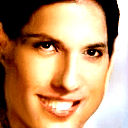

In [ ]:
interpolated_images = interpolate_between_vectors()
animate(interpolated_images)

### Playground


 
1. Run multiple times to see different interpolation
2. Play with number of interpolated vectors for finer transactions

